# Прогнозирование Просрочки по Кредиту

### 1. Знакомство с данными

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(context='notebook', 
              style='darkgrid', 
              palette='deep', 
              font='sans-serif', 
              font_scale=1, 
              color_codes=True, rc=None)

In [24]:
info = pd.read_excel('/Users/ajkenkazin/ALL-PROJECTS/Outpeer-kz/outpeer/classic-ml/demo-project-ml/data/Использованные переменные.xlsx')
info

,feats,description_en,description_ru
0,days_90_queries,Number of requests for 90 days,Количество запросов за 90 дней
1,flag_zpexp,Availability of project salary,Наличие ЗП проекта
2,ageolddate_f7,Age of the oldest contract by client in months,Возраст самого старого договора по клиенту в мес
3,f41_my,Number of months since the beginning of the la...,Кол-во месяцев с начала последней просрочки 90+
4,age2,Age of the client,возраст клиента
5,f39_my,Number of months since the beginning of the la...,Кол-во месяцев с начала последней просрочки 30-60
6,active_crd_amount_to_limit,Ratio of the sum of the amounts used to the su...,Отношение суммы использованных сумм к сумме ли...
7,sumlastvalue_7_f50,Amount of the last overdue payment 1-7,Сумма последней просрочки 1-7
8,avg_active_credit_limit,Average limit amount of active credit cards,Средняя сумма лимита активных кредитных карт
9,total_amount,Total amount of loans for the entire period (e...,Общая сумма кредитов за все время (без учета КК)


In [25]:
df = pd.read_csv("../data/train_data.csv")

In [26]:
features = [
    "days_90_queries",               # Количество запросов за 90 дней
    "ageolddate_f7",                 # Возраст самого старого договора по клиенту в месяцах | количество месяцев, прошедших с момента, когда клиент впервые получил кредит
    "f41_my",                        # Количество месяцев с начала последней просрочки 90+
    "age2",                          # Возраст клиента
    "active_crd_amount_to_limit",    # Отношение суммы используемых сумм к сумме лимитов
    "sumlastvalue_7_f50",            # Сумма последней просрочки 1-7
    "avg_active_credit_limit",       # Средняя сумма лимита активных кредитных карт
    "total_amount",                  # Общая сумма кредитов за все время (без учета КК)
    "max_del_history",               # Длительность максимальной просрочки
    "overdue_credit_contract",        # Общая сумма просрочек (без учета КК)
    "target"
]

df = df[features]
df.head()

,days_90_queries,ageolddate_f7,f41_my,age2,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,max_del_history,overdue_credit_contract,target
0,4.0,26.0,NaN,25.0,NaN,6017.76,NaN,240379.25,0.0,40270.45,0
1,2.0,101.0,NaN,31.0,0.654416,NaN,360000.0,50938389.00,1.0,144976.79,0
2,11.0,46.0,NaN,22.0,0.608811,NaN,73384.0,327790.00,0.0,19065.00,0
3,4.0,126.0,NaN,45.0,0.761899,NaN,1081991.0,17920000.00,0.0,0.00,0
4,4.0,126.0,NaN,45.0,0.761899,NaN,1081991.0,17920000.00,0.0,0.00,0


In [27]:
# Посмотрим есть ли дупликаты, если есть их дропнем

len(df[df.duplicated()])

11777

In [28]:
df = df.drop_duplicates()

In [29]:
# посмотрим на информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43935 entries, 0 to 55710
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   days_90_queries             43038 non-null  float64
 1   ageolddate_f7               43819 non-null  float64
 2   f41_my                      17931 non-null  float64
 3   age2                        43935 non-null  float64
 4   active_crd_amount_to_limit  29144 non-null  float64
 5   sumlastvalue_7_f50          25918 non-null  float64
 6   avg_active_credit_limit     30629 non-null  float64
 7   total_amount                41286 non-null  float64
 8   max_del_history             32231 non-null  float64
 9   overdue_credit_contract     43090 non-null  float64
 10  target                      43935 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 4.0 MB


In [30]:
# Посмотрим какие колонки содержит null значений
df.isna().sum()

days_90_queries                 897
ageolddate_f7                   116
f41_my                        26004
age2                              0
active_crd_amount_to_limit    14791
sumlastvalue_7_f50            18017
avg_active_credit_limit       13306
total_amount                   2649
max_del_history               11704
overdue_credit_contract         845
target                            0
dtype: int64

<span style="color: red;">здесь нужно хэндлит с пропушенными значениями</span>

In [31]:
# Здесь мы их просто дропнем
df = df.dropna()
df.shape

(5245, 11)

In [32]:
# Посмотрим на пропорций 0 и 1 в нашем таргете
df.target.value_counts()

target
0    4074
1    1171
Name: count, dtype: int64

In [33]:
df.head()

,days_90_queries,ageolddate_f7,f41_my,age2,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,max_del_history,overdue_credit_contract,target
14,8.0,69.0,15.0,27.0,0.862982,3967.25,303611.5,416703.00,0.0,234499.18,0
15,0.0,119.0,7.0,41.0,0.307990,26681.83,200000.0,1648805.00,10.0,243159.20,0
31,2.0,93.0,62.0,34.0,0.167415,17115.79,1861445.5,17478617.24,0.0,3147916.87,0
54,12.0,101.0,11.0,37.0,0.773414,54776.00,1512372.0,45220909.95,0.0,17282601.48,0
58,10.0,104.0,15.0,29.0,0.996545,52000.00,150000.0,1531034.92,4.0,0.00,0


### 2. EDA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 0, 'Количество запросов за 90 дней')

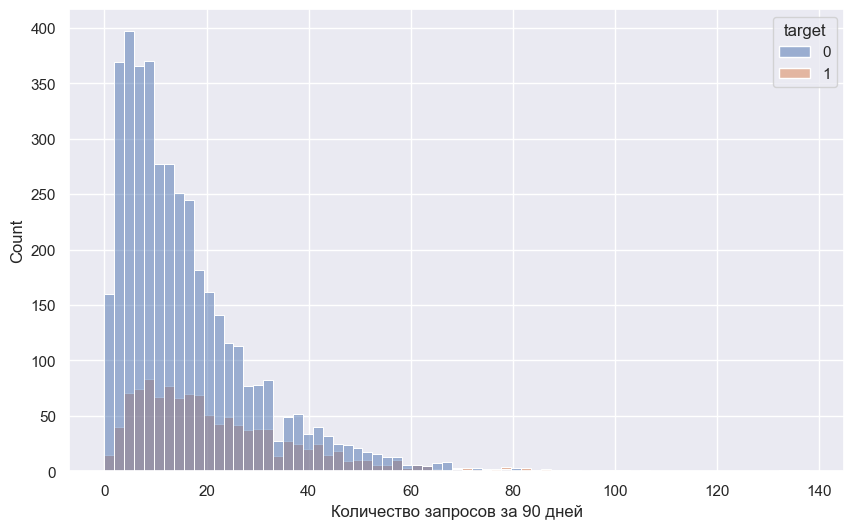

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="days_90_queries", hue='target')
plt.xlabel("Количество запросов за 90 дней")

Теперь давайте установим различие между двумя распределениями

In [35]:
# Тест манна уитни
from scipy.stats import mannwhitneyu

group_0 = df[df['target'] == 0]['days_90_queries']
group_1 = df[df['target'] == 1]['days_90_queries']
print(group_0.median())
print(group_1.median())

stat, p_value = mannwhitneyu(group_0, group_1)
print("statistic:", stat)
print("p-value:", p_value)
print(p_value < 0.05)


12.0
18.0
statistic: 1762650.0
p-value: 2.270290503946532e-42
True


P значение гораздо меньше чем 0.05. Pазличие считается статистически значимым, и можно заключить, что распределения для классов target = 0 и target = 1 различаются

Построим корреляцию пирсона 

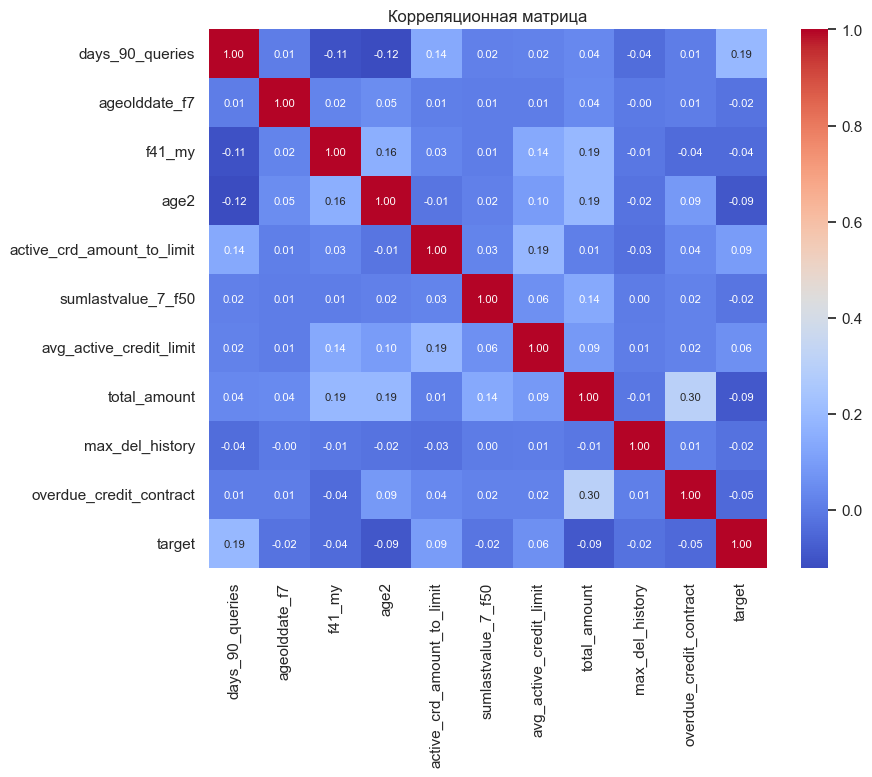

In [36]:
correlation = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})
plt.title('Корреляционная матрица')
plt.show()

Как нам видно что никакой колонок между собой особо не корелиирует

Посмотрим на колонок `ageolddate_f7` количество месяцев, прошедших с момента, когда клиент впервые получил кредит

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

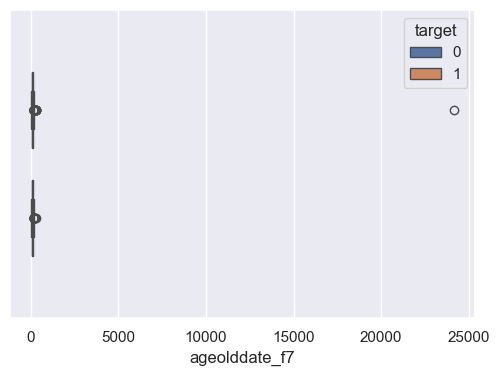

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='ageolddate_f7', hue='target',width=0.7, gap=0.3)
# plt.legend(bbox_to_anchor=(0.7, 1), loc='upper left', borderaxespad=0)
# plt.title('Площадь квартиры по регионам')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

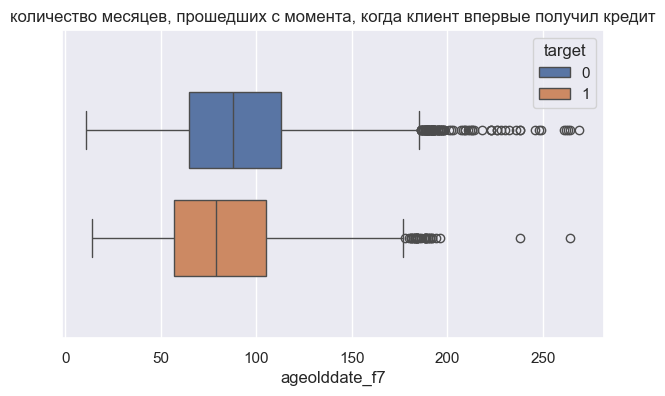

In [38]:
# Видим один выброс 
df = df[df['ageolddate_f7']<5_000]

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='ageolddate_f7', hue='target',width=0.7, gap=0.3)
# plt.legend(bbox_to_anchor=(0.7, 1), loc='upper left', borderaxespad=0)
plt.title('количество месяцев, прошедших с момента, когда клиент впервые получил кредит')
plt.show()

In [39]:
Q1 = df['ageolddate_f7'].quantile(0.25)
Q3 = df['ageolddate_f7'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, чтобы исключить выбросы (тут нам не нужно использовтаь нижную границу)
df = df[(df['ageolddate_f7'] <= upper_bound)]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 0, 'Количество запросов за 90 дней')

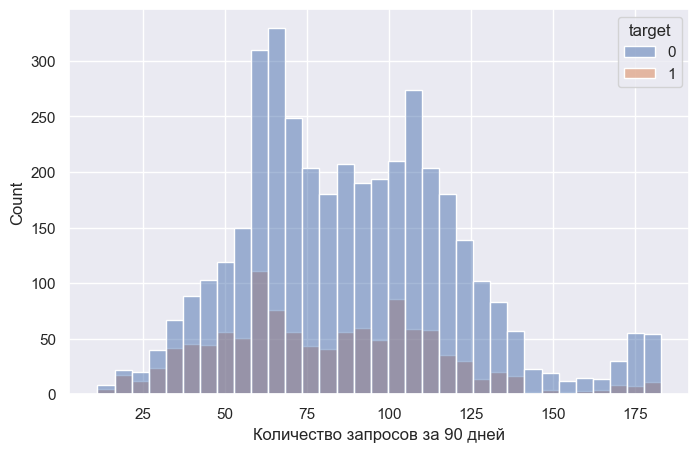

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="ageolddate_f7", hue='target')
plt.xlabel("Количество запросов за 90 дней")

Мы видим какие то мультимодельаность

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_k

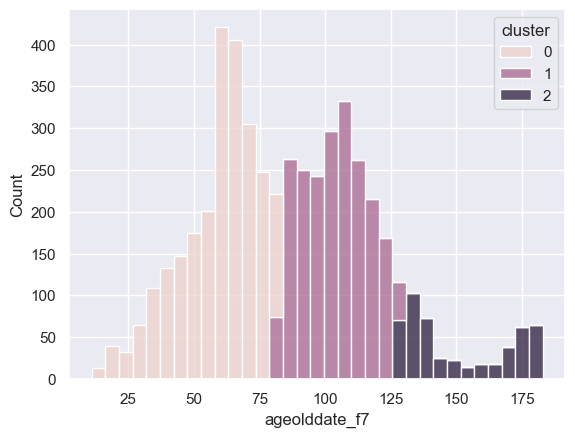

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) 
df['cluster'] = kmeans.fit_predict(df[['ageolddate_f7']])
sns.histplot(data=df, x="ageolddate_f7", hue='cluster', multiple="stack")
plt.show()

In [77]:
import pickle

with open('../my_app/kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [42]:
df.head()

,days_90_queries,ageolddate_f7,f41_my,age2,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,max_del_history,overdue_credit_contract,target,cluster
14,8.0,69.0,15.0,27.0,0.862982,3967.25,303611.5,416703.00,0.0,234499.18,0,0
15,0.0,119.0,7.0,41.0,0.307990,26681.83,200000.0,1648805.00,10.0,243159.20,0,1
31,2.0,93.0,62.0,34.0,0.167415,17115.79,1861445.5,17478617.24,0.0,3147916.87,0,1
54,12.0,101.0,11.0,37.0,0.773414,54776.00,1512372.0,45220909.95,0.0,17282601.48,0,1
58,10.0,104.0,15.0,29.0,0.996545,52000.00,150000.0,1531034.92,4.0,0.00,0,1


`f41_my` — Количество месяцев с начала последней просрочки 90+

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 0, 'Количество месяцев с начала последней просрочки 90+')

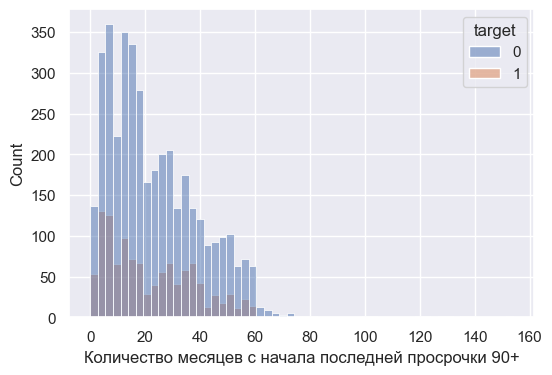

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="f41_my", hue='target')
plt.xlabel("Количество месяцев с начала последней просрочки 90+")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 0, 'Количество месяцев с начала последней просрочки 90+')

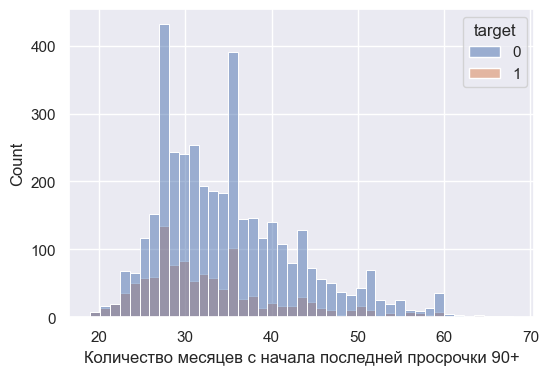

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="age2", hue='target')
plt.xlabel("Количество месяцев с начала последней просрочки 90+")

`active_crd_amount_to_limit` — Отношение суммы используемых сумм к сумме лимитов

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 0, 'Отношение суммы используемых сумм к сумме лимитов')

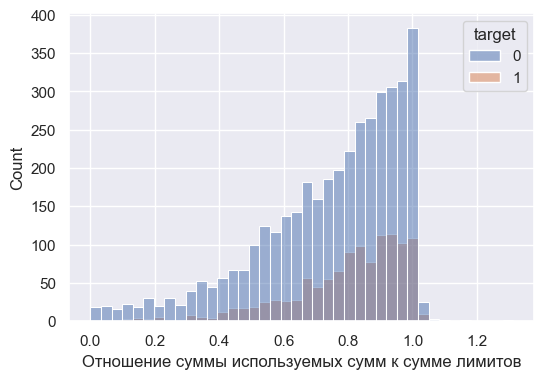

In [45]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="active_crd_amount_to_limit", hue='target')
plt.xlabel("Отношение суммы используемых сумм к сумме лимитов")

`sumlastvalue_7_f50` — Сумма последней просрочки 1–7 дней

In [46]:
df.head()

,days_90_queries,ageolddate_f7,f41_my,age2,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,max_del_history,overdue_credit_contract,target,cluster
14,8.0,69.0,15.0,27.0,0.862982,3967.25,303611.5,416703.00,0.0,234499.18,0,0
15,0.0,119.0,7.0,41.0,0.307990,26681.83,200000.0,1648805.00,10.0,243159.20,0,1
31,2.0,93.0,62.0,34.0,0.167415,17115.79,1861445.5,17478617.24,0.0,3147916.87,0,1
54,12.0,101.0,11.0,37.0,0.773414,54776.00,1512372.0,45220909.95,0.0,17282601.48,0,1
58,10.0,104.0,15.0,29.0,0.996545,52000.00,150000.0,1531034.92,4.0,0.00,0,1


### 3. Model


### 3.1. Logistic Regression:

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import (
    accuracy_score, 
    f1_score, precision_score, 
    recall_score, 
    classification_report, 
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    auc
)

In [48]:
X = df.drop(columns=['target'])
y = df.target

# Сплитим датасет
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
# Используем ColumnTransformer чтобы скэйлит определенные колонки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns) 
    ], remainder='passthrough' 
)

# Создаем пайплайн
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # First step: apply column-specific scaling
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=10_000, random_state=42))  # Second step: logistic regression
])

# Установим гиперпараметры
param_grid = {
    'logreg__C': [0.1, 1, 10, 100]
}

# Установим GridSearchCV вместо с пайплайном
grid_search_lr_weighted = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

In [50]:
# Обучим 
grid_search_lr_weighted.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['days_90_queries', 'ageolddate_f7', 'f41_my', 'age2',
       'active_crd_amount_to_limit', 'sumlastvalue_7_f50',
       'avg_active_credit_limit', 'total_amount', 'max_del_history',
       'overdue_credit_contract', 'cluster'],
      dtype='object'))])),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [51]:
df

,days_90_queries,ageolddate_f7,f41_my,age2,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,max_del_history,overdue_credit_contract,target,cluster
14,8.0,69.0,15.0,27.0,0.862982,3967.25,3.036115e+05,416703.00,0.0,234499.18,0,0
15,0.0,119.0,7.0,41.0,0.307990,26681.83,2.000000e+05,1648805.00,10.0,243159.20,0,1
31,2.0,93.0,62.0,34.0,0.167415,17115.79,1.861446e+06,17478617.24,0.0,3147916.87,0,1
54,12.0,101.0,11.0,37.0,0.773414,54776.00,1.512372e+06,45220909.95,0.0,17282601.48,0,1
58,10.0,104.0,15.0,29.0,0.996545,52000.00,1.500000e+05,1531034.92,4.0,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
55587,16.0,55.0,4.0,28.0,0.968970,47146.00,2.500000e+05,4562336.53,0.0,1566572.69,0,0
55619,8.0,92.0,44.0,36.0,0.828668,11356.25,5.000295e+05,629470.00,4.0,0.00,1,1
55631,17.0,87.0,36.0,33.0,1.036251,152.97,1.500000e+05,7323263.00,0.0,2564972.32,1,1
55635,10.0,104.0,51.0,33.0,0.836178,5000.00,7.857227e+05,5388900.00,0.0,0.00,1,1


In [52]:
# Посмотрим какие лучшие параметры используя кросс валидаций
print(f"Лучшие параметры: {grid_search_lr_weighted.best_params_}")
print(f"Лучший кросс-валидационный результат: {grid_search_lr_weighted.best_score_}")

# Используя лучшие параметры предсказуем на тестовые данные 
y_pred = grid_search_lr_weighted.predict(X_test)

# Посмотрим на confusion matrix
print(f"{confusion_matrix(y_test, y_pred)}")

# Посмотрим на confusion matrix
print(f"{classification_report(y_test, y_pred)}")

Лучшие параметры: {'logreg__C': 0.1}
Лучший кросс-валидационный результат: 0.6366765908817514
[[518 273]
 [ 92 137]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       791
           1       0.33      0.60      0.43       229

    accuracy                           0.64      1020
   macro avg       0.59      0.63      0.58      1020
weighted avg       0.73      0.64      0.67      1020



In [53]:
def roc_auc(y_pred_proba, y_test):
    """Это функция постройт ROC кривой"""
    # Вычисляем ROC кривую и AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Построение графика ROC AUC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # линия для сравнения
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Выводим AUC
    print(f"AUC: {roc_auc:.2f}")

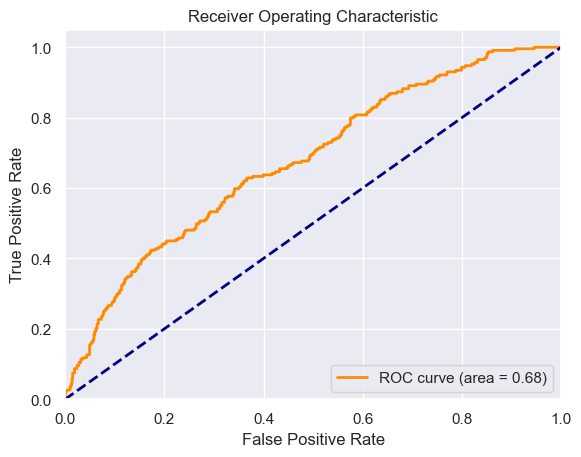

AUC: 0.68


In [54]:
y_pred_proba = grid_search_lr_weighted.predict_proba(X_test)[:, 1]
roc_auc(y_pred_proba, y_test)

### 3.2 Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier


pipeline = Pipeline([
    ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])


param_grid = {
    'tree__max_depth': [5, 10, 15, None], 
    'tree__min_samples_split': [2, 10, 20],
    'tree__min_samples_leaf': [1, 5, 10],
    'tree__criterion': ['gini', 'entropy'] 
}


grid_search_dt_weighted = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

In [56]:
grid_search_dt_weighted.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tree',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'tree__criterion': ['gini', 'entropy'],
                         'tree__max_depth': [5, 10, 15, None],
                         'tree__min_samples_leaf': [1, 5, 10],
                         'tree__min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [57]:
print(f"Лучшие параметры: {grid_search_dt_weighted.best_params_}")
print(f"Лучший кросс-валидационный результат: {grid_search_dt_weighted.best_score_}")

y_pred = grid_search_dt_weighted.predict(X_test)

print(f"{confusion_matrix(y_test, y_pred)}")

print(f"{classification_report(y_test, y_pred)}")

Лучшие параметры: {'tree__criterion': 'gini', 'tree__max_depth': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Лучший кросс-валидационный результат: 0.706544268013954
[[656 135]
 [143  86]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       791
           1       0.39      0.38      0.38       229

    accuracy                           0.73      1020
   macro avg       0.61      0.60      0.60      1020
weighted avg       0.72      0.73      0.73      1020



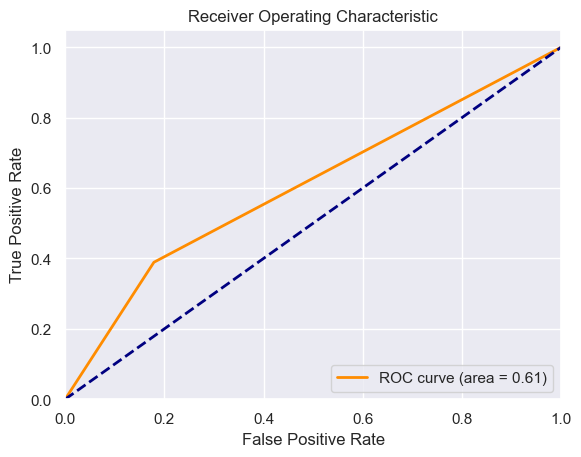

AUC: 0.61


In [58]:
roc_auc(y_test,y_pred)

### 3.3 Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Масштабируем данные
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))  # Случайный лес с balanced class weights
])

param_grid = {
    'rf__n_estimators': [100, 200], 
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 10],
    'rf__min_samples_leaf': [1, 5]
}


grid_search_rf_weighted = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

In [61]:
grid_search_rf_weighted.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['days_90_queries', 'ageolddate_f7', 'f41_my', 'age2',
       'active_crd_amount_to_limit', 'sumlastvalue_7_f50',
       'avg_active_credit_limit', 'total_amount', 'max_del_history',
       'overdue_credit_contract', 'cluster'],
      dtype='object'))])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'rf__max_depth': [10, 20, None],
                         'rf__min_samples_leaf': [1, 5],
                         'rf__min_samples_split': [2, 10],
                         'rf__n_estimators': [100, 200]},
             scoring='accuracy')

In [62]:
y_pred = grid_search_rf_weighted.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       791
           1       0.63      0.20      0.30       229

    accuracy                           0.79      1020
   macro avg       0.72      0.58      0.59      1020
weighted avg       0.77      0.79      0.75      1020



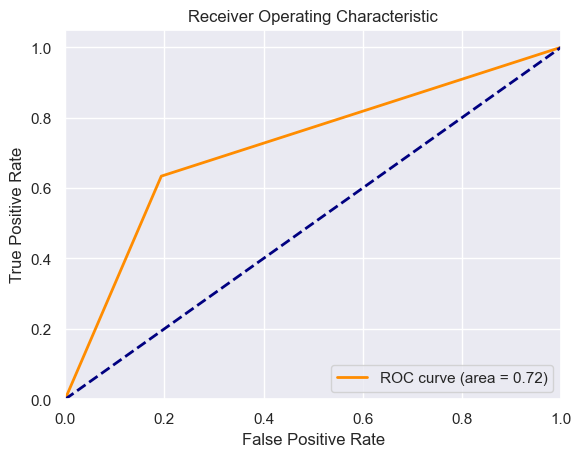

AUC: 0.72


In [63]:
roc_auc(y_test,y_pred)

### 3.4. XGBoost

In [64]:
from xgboost import XGBClassifier

In [65]:
negative_count = sum(y_train == 0)
positive_count = sum(y_train == 1)
scale_pos_weight = negative_count / positive_count


pipeline = Pipeline([
    ('xgb', XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')) 
])


param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 6, 10], 
    'xgb__learning_rate': [0.01, 0.1, 0.2], 
    'xgb__subsample': [0.8, 1.0],  
    'xgb__colsample_bytree': [0.8, 1.0] 
}


grid_search_xgb_weight = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')


grid_search_xgb_weight.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:35:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:35:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:35:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:35:52] WARNING: /Users/runner/work/xgboost/xgboost/src

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constrai...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'xgb__colsample_bytree': [0.8, 1.0],
                         'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 6, 10],
                         'xgb__n_estimators': [100, 200],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='accuracy')

In [66]:
y_pred = grid_search_xgb_weight.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

# Посмотрим на f1 score
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       791
           1       0.51      0.36      0.42       229

    accuracy                           0.78      1020
   macro avg       0.67      0.63      0.64      1020
weighted avg       0.76      0.78      0.76      1020

0.4223918575063613


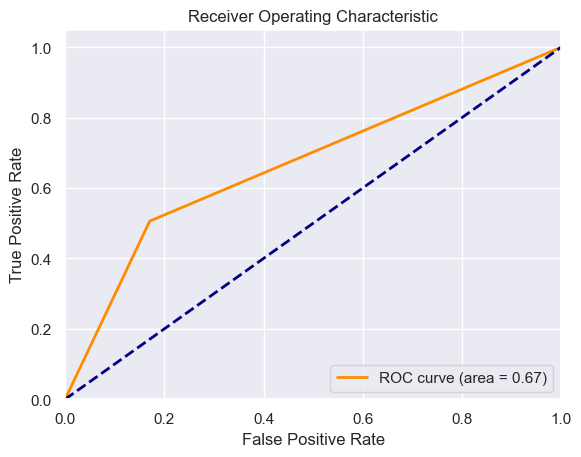

AUC: 0.67


In [67]:
roc_auc(y_test,y_pred)

Выбираем третьи модель

In [68]:
import pickle

with open('../my_app/model.pkl', 'wb') as file:
    pickle.dump(grid_search_rf_weighted, file)

In [69]:
import pickle
with open('../my_app/model.pkl', 'rb') as file:
    model = pickle.load(file)

In [70]:
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['days_90_queries', 'ageolddate_f7', 'f41_my', 'age2',
       'active_crd_amount_to_limit', 'sumlastvalue_7_f50',
       'avg_active_credit_limit', 'total_amount', 'max_del_history',
       'overdue_credit_contract', 'cluster'],
      dtype='object'))])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'rf__max_depth': [10, 20, None],
                         'rf__min_samples_leaf': [1, 5],
                         'rf__min_samples_split': [2, 10],
                         'rf__n_estimators': [100, 200]},
             scoring='accuracy')

In [85]:
data = pd.DataFrame([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10,1]], columns=X_train.columns)



# Выполните предсказание
model.predict(data)

array([0])

In [80]:
with open('../my_app/kmeans_model.pkl', 'rb') as file:
    kmeans = pickle.load(file)

In [89]:
a = kmeans.predict([[3]])

data = pd.DataFrame([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, int(a)]], columns=X_train.columns)



# Выполните предсказание
model.predict(data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/var/folders/3d/zmv6msfd6y96nxmyvrc6d9jw0000gn/T/ipykernel_97054/579058306.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data = pd.DataFrame([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, int(a)]], columns=X_train.columns)


array([0])

In [93]:
clus = kmeans.predict([[3]])

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float(clus)]



data = pd.DataFrame([data], 
                    columns=['days_90_queries', 'ageolddate_f7', 'f41_my', 'age2',
                            'active_crd_amount_to_limit', 'sumlastvalue_7_f50',
                            'avg_active_credit_limit', 'total_amount', 'max_del_history',
                            'overdue_credit_contract', 'cluster']
                    )

predictions = model.predict(data)
print(predictions)

[0]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/var/folders/3d/zmv6msfd6y96nxmyvrc6d9jw0000gn/T/ipykernel_97054/715865659.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float(clus)]


In [78]:
data = np.array([data]).reshape(-1,1)
print(data)

data = pd.DataFrame(data, 
                    columns=['days_90_queries', 'ageolddate_f7', 'f41_my', 'age2',
                            'active_crd_amount_to_limit', 'sumlastvalue_7_f50',
                            'avg_active_credit_limit', 'total_amount', 'max_del_history',
                            'overdue_credit_contract', 'cluster']
                    )
print(data)

predictions = model.predict(data)
print(data)

Index(['days_90_queries', 'ageolddate_f7', 'f41_my', 'age2',
       'active_crd_amount_to_limit', 'sumlastvalue_7_f50',
       'avg_active_credit_limit', 'total_amount', 'max_del_history',
       'overdue_credit_contract', 'cluster'],
      dtype='object')

In [91]:
predictions

array([0])